In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
np.random.seed(1234)
import scipy.stats as stats

In [2]:
def IBP(N, alpha):
    """Indian Buffet Process (IBP) steps:
    Input: N is the number of customers (objects, images); alpha is the only parameter;
    Return: result is the binary matrix (prior); Kplus is the number of dishes (features)"""
    result = np.zeros((N,1000))
    
    # Step 1: First customer takes a Poisson(alpha) of dishes
    t = stats.poisson.rvs(alpha) # (set the random seed when calling the function)
    if t > 0:
        result[0,0:t] = 1
    
    # Kplus = the number of features for which m_k > 0 (m_k: the number of previous customers who sampled that dish)
    Kplus = t
    for i in range(1,N):
        for k in range(Kplus):
            # Step 2: The ith customer takes dish k with probability m_k/i
            p = np.sum(result[0:(i+1),k])/(i+1) # this is a probability, so should be between 0 and 1
            assert p <= 1 
            assert p >= 0
            if stats.uniform.rvs(0) < p:
                result[i,k] = 1
            else:
                result[i,k] = 0
                
        # Step 3: The ith customer tries a Poisson(alpha/i) number of new dishes
        t = stats.poisson.rvs(alpha/(i+1))
        if t > 0:
            result[i,Kplus:(Kplus+t)] = 1
        Kplus += t
    result = result[:,0:Kplus]
    
    return result, Kplus

In [3]:
np.random.seed(12)
N1 = 100
alpha1 = 1.5

result1, Kplus1 = IBP(N1,alpha1)
print (Kplus1)

print (result1)

5
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [1 1 1 0 0 0]
 [0 1 0 0 0 0]]
Latent feature matrices (A):


/Users/littlelotus/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


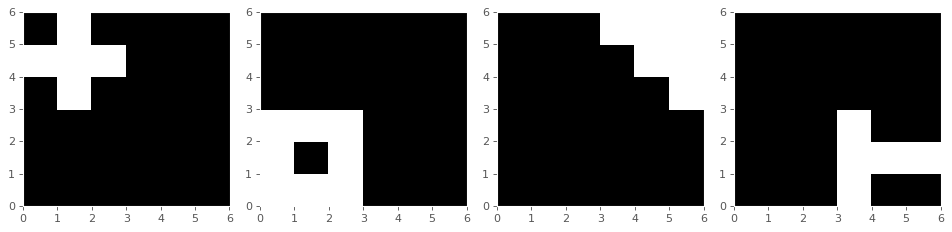

In [4]:
# Basis images
basis1 = np.array([[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,1,0,0,0,0],[1,1,1,0,0,0],[0,1,0,0,0,0]])
basis2 = np.array([[1,1,1,0,0,0],[1,0,1,0,0,0],[1,1,1,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]])
basis3 = np.array([[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,1],[0,0,0,0,1,1],[0,0,0,1,1,1]])
basis4 = np.array([[0,0,0,1,0,0],[0,0,0,1,1,1],[0,0,0,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]])

print(basis1)
D = 36
b1 = basis1.reshape(D)
b2 = basis2.reshape(D)
b3 = basis3.reshape(D)
b4 = basis4.reshape(D)
A = np.array([b1,b2,b3,b4])

#heatmaps
plt.figure(num=None, tight_layout=True, figsize=(12,3), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(141)
plt.pcolormesh(basis1,cmap=plt.cm.gray)     
plt.subplot(142)
plt.pcolormesh(basis2,cmap=plt.cm.gray)  
plt.subplot(143)
plt.pcolormesh(basis3,cmap=plt.cm.gray)  
plt.subplot(144)
plt.pcolormesh(basis4,cmap=plt.cm.gray)  
# plt.savefig('basis_images.png')
print ("Latent feature matrices (A):")

Example image:
 [[ 0.2067  0.3588  0.1309  0.8786 -0.2506 -0.3491]
 [ 0.6923 -0.1432  0.25    1.9756  0.8608  1.0184]
 [ 0.2229 -0.7052  0.225   1.2577 -0.577  -0.6901]
 [-0.2479  0.7934 -0.8597 -0.0148 -0.383   1.0499]
 [ 0.6435 -0.1131  1.3629  0.4585  0.7181  0.2389]
 [-0.0071  0.8766 -0.0827  1.0596 -0.0375  0.4986]]


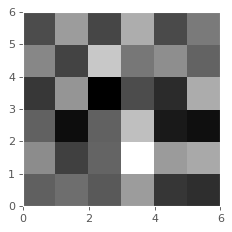

In [5]:
# Generate image data: 100 matrices of size 6*6
N = 100
D = 36
K = 4
sigmaX_orig = 0.5

# All K basis images, each of length D
# Generate N images (customers, objects)
np.random.seed(1234)
images = np.zeros((N,6,6)) # simulated image data
structure = np.zeros((N,6,6))  # 0/1 structure for each image
add = stats.bernoulli.rvs(0.5,size=(N,K)) # whether the K=4 latent bases are present in each image
epsilon = stats.norm.rvs(loc=0,scale=0.5,size = (N,6,6)) # random noise

for i in range(N):
    structure[i,:,:] = add[i,0]*basis1 + add[i,1]*basis2 + add[i,2]*basis3 + add[i,3]*basis4
    images[i,:,:] = structure[i,:,:] + epsilon[i,:,:]


# print images.shape
print ("Example image:\n",images[4])
plt.figure(tight_layout=True, figsize=(3,3),dpi=80)
plt.pcolormesh(images[4],cmap=plt.cm.gray)

In [6]:
# Image Initialization
np.random.seed(1)
Z_orig = np.zeros((N,4))
sigmaX_orig = 0.5
X = np.zeros((N,D))

for i in range(N):
    Z_orig[i,:] = stats.uniform.rvs(loc=0,scale=1,size=4) > 0.5
    while np.sum(Z_orig[i,:]) == 0:
        Z_orig[i,:] = stats.uniform.rvs(loc=0,scale=1,size=4) > 0.5
    X[i,:] = np.random.normal(size=D)*sigmaX_orig + np.dot(Z_orig[i,:],A)
    
print ("X.shape:",X.shape) # (100,36) = (N,D) (data)
print (X[0:6,0:6])
print (Z_orig.shape)
print (Z_orig[0:6,:])
# print np.dot(Z_orig[i,:],A).shape

X.shape: (100, 36)
[[ 0.7359  0.4635  1.4327 -1.1508  0.8724 -0.3806]
 [ 0.6264  1.8462  1.0254 -0.3185  0.0955  1.0501]
 [ 0.8888  0.8996  1.0933  1.205   0.0991  0.0595]
 [ 1.5607  1.2045  0.9877 -0.3876  0.6369  0.9836]
 [ 0.9318  0.9405  1.0087  0.439  -0.2585 -0.4985]
 [ 1.3012  1.2101  1.4055  1.5222 -0.2004  0.412 ]]
(100, 4)
[[0. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 1.]
 [1. 1. 0. 0.]
 [1. 1. 0. 1.]
 [1. 1. 0. 1.]]


In [7]:
# Initialization for IBP
N = 100
D = 36
K = 4
sigmaA = 1
sigmaX = 1

# np.random.seed(1005)
np.random.seed(1)
alpha = 1

K_inf = 1000
Z, Kplus = IBP(N, alpha)
print ("Initial Kplus:", Kplus)
print ("Z.shape:",Z.shape) # (100,4) = (N,Kplus) (latent)
print ("A.shape:",A.shape) # (4,36) = (Kplus,D)  (weight)

# Set Markov Chain MC steps
mcmc = 1000 # plan to sample for 1000 times

# Setup the array
Z_arr = np.zeros((mcmc,N,K_inf))
Kplus_arr = np.zeros(mcmc)
sigmaX_arr = np.zeros(mcmc)
sigmaA_arr = np.zeros(mcmc)
alpha_arr = np.zeros(mcmc)
rX_accept = 0
rA_accept = 0

Initial Kplus: 4
Z.shape: (100, 4)
A.shape: (4, 36)


In [8]:
# Check gamma distribution 
np.random.seed(17)
rv = stats.gamma.rvs(a = 3, loc = 0, scale = 2, size=1000)
print (np.mean(rv))  # should be close to 3*2 = 6
print (np.var(rv))   # should be close to 3*2*2 = 12

6.1108245519792135
12.383632613458975


In [9]:
# Gibbs Sampler functions
def calcM(Z,Kplus,sigmaX,sigmaA):
    """Save the matrix M so we won't need to calculate it again and again"""
    return np.linalg.inv(np.dot(Z[:,0:Kplus].T,Z[:,0:Kplus])+((sigmaX/sigmaA)**2)*np.identity(Kplus))

def calcInverse_orig(Z, M, i, k, val):
    """Effective inverse calculation from Griffiths and Ghahramani (2005; Equations 51 to 54)
    M_(-i) = inv(inv(M) - zi.T * zi)"""
    M_i = M - np.dot(np.dot(M,Z[i,:].T),np.dot(Z[i,:],M))/(np.dot(np.dot(Z[i,:],M),Z[i,:].T)-1)
    Z[i,k] = val
    M = M_i - np.dot(np.dot(M_i,Z[i,:].T),np.dot(Z[i,:],M_i))/(np.dot(np.dot(Z[i,:],M_i),Z[i,:].T)+1)
    Inv = M
    return Inv

def calcInverse(Z, M, i, k, val):
    """New version to check: M_(-i) = inv(inv(M) - zi.T * zi) and M = inv(inv(M_(-i)) + zi.T * zi)"""
    M_i = np.linalg.inv(np.linalg.inv(M) - np.dot(Z[i,:].T,Z[i,:]))
    Z[i,k] = val
    M = np.linalg.inv(np.linalg.inv(M_i) + np.dot(Z[i,:].T,Z[i,:]))
    return M

def log_likelihood(X,Z,M,sigmaA,sigmaX,Kplus,N,D):  
    """Calculate the log-likelihood: P(X|Z,M,sigmaA,sigmaX,Kplus,N,D)"""  
    determinant = np.linalg.det(np.dot(Z.T,Z)+((sigmaX/sigmaA)**2)*np.identity(Kplus))
    constant = N*D*0.5*np.log(2*np.pi) + (N-Kplus)*D*np.log(sigmaX) + Kplus*D*np.log(sigmaA) + D*0.5*np.log(determinant)
    
    middle = np.identity(N) - np.dot(np.dot(Z, M),Z.T)
    trace = np.trace(np.dot(np.dot(X.T,middle),X))
    kernel = -0.5*np.reciprocal(sigmaX**2)*trace
    
    log_lik = -constant + kernel
    return log_lik

In [10]:
print(Z.shape)
M = calcM(Z,Kplus,sigmaX,sigmaA) 
log_likelihood(X,Z[:,0:Kplus],M,sigmaA,sigmaX,Kplus,N,D)

(100, 4)


-4274.774747709113

In [14]:
import timeit

assert Kplus > 0
assert N > 0
assert D > 0
assert sigmaX > 0
assert sigmaA > 0

# Harmonics
from fractions import Fraction
sum_Harmonics = 0
Harmonics = 0
for i in range(N):
    sum_Harmonics += (N-i)*Fraction(1,i+1)
    Harmonics += Fraction(1,i+1)

# Gibbs Sampler -- Steps
np.random.seed(111)
elapsed = 0
elapsed1 = 0
elapsed2 = 0
elapsed1k_count = 0
elapsed1N_count = 0
elapsed1k_init = 0
elapsed1k_calc = 0

elapsed1_arr = np.zeros(mcmc)
elapsed2_arr = np.zeros(mcmc)
elapsed1k_count_arr = np.zeros(mcmc)
elapsed1N_count_arr = np.zeros(mcmc)
elapsed1k_init_arr = np.zeros(mcmc)
elapsed1k_calc_arr = np.zeros(mcmc)

start = timeit.default_timer()

for mc in range(1000):

    # Step 0: Save generated parameters to the MCMC array
    Z_arr[mc,:,0:Kplus] = Z[:,0:Kplus]
    
    alpha_arr[mc] = alpha
    Kplus_arr[mc] = Kplus
    sigmaX_arr[mc] = sigmaX
    sigmaA_arr[mc] = sigmaA
    print ("At iteration",mc,": Kplus is",Kplus,", alpha is",alpha)
    elapsed1_arr[mc] = elapsed1
    elapsed2_arr[mc] = elapsed2
    elapsed1k_count_arr[mc] = elapsed1k_count/N
    elapsed1N_count_arr[mc] = elapsed1N_count/N
    elapsed1k_init_arr[mc] = elapsed1k_init
    elapsed1k_calc_arr[mc] = elapsed1k_calc
    
    # Step 1: Generate Z|alpha (Gibbs)
    start1 = timeit.default_timer()
    elapsed1k_count = 0
    elapsed1N_count = 0
    for i in range(N):
        M = calcM(Z,Kplus,sigmaX,sigmaA)
        
        start1k = timeit.default_timer()
        
        for k in range(Kplus):
            start1k_init = timeit.default_timer()
            # This is possible because Kplus may decrease in this loop (e.g. dropping redundant zeros)
            if (k+1) > Kplus:
                break
            if Z[i,k] > 0:
                # Take care of singular features
                # Get rid of the features not sampled (remove the zeros)
                if np.sum(Z[:,k]) - Z[i,k] <= 0: # whether the dish is sampled by other customers or not
                    Z[:,k:(Kplus-1)] = Z[:,(k+1):Kplus]
                    Kplus -= 1 
                    M = calcM(Z,Kplus,sigmaX,sigmaA)
                    continue            
            elapsed1k_init = timeit.default_timer() - start1k_init
            
            start1k_calc = timeit.default_timer()
            
            P = np.zeros(2)
            Z[i,k] = 1
            M1 = calcM(Z,Kplus,sigmaX,sigmaA) 
            P[1] = log_likelihood(X,Z[:,0:Kplus],M1,sigmaA,sigmaX,Kplus,N,D) + np.log(sum(Z[:,k])-Z[i,k]) - np.log(N)
            Z[i,k] = 0
            M0 = calcM(Z,Kplus,sigmaX,sigmaA) 
            P[0] = log_likelihood(X,Z[:,0:Kplus],M0,sigmaA,sigmaX,Kplus,N,D) + np.log(N-sum(Z[:,k])) - np.log(N)
            P = np.exp(P - max(P))
            # Sample from the posterior distribution
            rand = stats.uniform.rvs(loc=0,scale=1,size=1)           
            if rand < P[0]/(P[0]+P[1]):
                Z[i,k] = 0
            else:
                Z[i,k] = 1
            elapsed1k_calc = timeit.default_timer() - start1k_calc
            
        elapsed1k = timeit.default_timer() - start1k
        elapsed1k_count += elapsed1k
        start1N = timeit.default_timer()
        
        trun = np.zeros(4)
        alphaN = alpha/N      
        
        # for ki in range(5):
        for ki in range(4):
            if ki > 0:
                new_stack = np.zeros((N,ki))
                new_stack[i,:] = 1
                Z = np.hstack((Z[:,0:Kplus],new_stack))
            M = np.linalg.inv(np.dot(Z[:,0:(Kplus+ki)].T,Z[:,0:(Kplus+ki)])+((sigmaX/sigmaA)**2)*np.identity(Kplus+ki))
            # Prior: x ~ Pois(lambda): f(x) = ((lambda**x)/x!)*exp(-lambda), where x = ki, lambda = alphaN
            
            trun[ki] = (ki)*np.log(alphaN) - alphaN - np.log(np.math.factorial(ki)) 
            # posterior is proportional to prior x likelihood
            trun[ki] += log_likelihood(X,Z[:,0:(Kplus+ki)],M,sigmaA,sigmaX,Kplus+ki,N,D)
            
        # Z[i,Kplus:(Kplus+4)] = 0
        Z[i,Kplus:(Kplus+3)] = 0
        trun = np.exp(trun-max(trun))
        trun = trun/np.sum(trun)
        
        p = stats.uniform.rvs(loc=0,scale=1,size=1)  
        t = 0
        # for ki in range(5):
        for ki in range(4):
            t += trun[ki]
            if p < t:
                new_dishes = ki
                break
        Z[i,Kplus:(Kplus+new_dishes)] = 1
        Kplus += new_dishes
        
        elapsed1N = timeit.default_timer() - start1N
        elapsed1N_count += elapsed1N
        
    elapsed1 = timeit.default_timer() - start1
    start2 = timeit.default_timer()
     
    # Step 2: Sample sigmaX_star (Metropolis)
    M = calcM(Z, Kplus, sigmaX, sigmaA)
    #logLik = log_likelihood(X, Z[:,0:(Kplus+new_dishes)], M, sigmaA, sigmaX, Kplus+new_dishes, N, D)
    logLik = log_likelihood(X, Z[:,0:Kplus], M, sigmaA, sigmaX, Kplus, N, D)
    epsilonX = stats.uniform.rvs(loc=0,scale=1,size=1) 
    if epsilonX < 0.5:
        sigmaX_star = sigmaX - stats.uniform.rvs(loc=0,scale=1,size=1)/20
    else:
        sigmaX_star = sigmaX + stats.uniform.rvs(loc=0,scale=1,size=1)/20 
    M_Xstar = calcM(Z, Kplus, sigmaX_star, sigmaA)
    # logLikX_star = log_likelihood(X, Z[:,0:(Kplus+new_dishes)], M_Xstar, sigmaA, sigmaX_star, Kplus+new_dishes, N, D)
    logLikX_star = log_likelihood(X, Z[:,0:Kplus], M_Xstar, sigmaA, sigmaX_star, Kplus, N, D)
    acc_X = np.exp(min(0, logLikX_star-logLik))
    
    # Step 3: Sample sigmaA_star (Metropolis)
    epsilonA = stats.uniform.rvs(loc=0,scale=1,size=1)
    if epsilonA < 0.5:
        # sigmaA_star = sigmaA - epsilonA/20
        sigmaA_star = sigmaA - stats.uniform.rvs(loc=0,scale=1,size=1)/20
    else:
        # sigmaA_star = sigmaA + epsilonA/40 
        sigmaA_star = sigmaA + stats.uniform.rvs(loc=0,scale=1,size=1)/20
        # sigmaA_star = sigmaA + epsilonA/20   
    # M_Astar = calcM(Z, Kplus+new_dishes, sigmaX, sigmaA_star)
    M_Astar = calcM(Z, Kplus, sigmaX, sigmaA_star)
    # logLikA_star = log_likelihood(X, Z[:,0:(Kplus+new_dishes)], M_Astar, sigmaA_star, sigmaX, Kplus+new_dishes, N, D)
    logLikA_star = log_likelihood(X, Z[:,0:Kplus], M_Astar, sigmaA_star, sigmaX, Kplus, N, D)
    acc_A = np.exp(min(0, logLikA_star-logLik))
    
    randX = stats.uniform.rvs(loc=0,scale=1,size=1)
    if randX < acc_X:
        sigmaX = sigmaX_star
        rX_accept += 1
    randA = stats.uniform.rvs(loc=0,scale=1,size=1)
    if randA < acc_A:
        sigmaA = sigmaA_star
        rA_accept += 1
    elapsed2 = timeit.default_timer() - start2
    
    # Step 4: Sample alpha|Z ~ Ga(a=1+Kplus,scale=1+Harmonics)
    alpha = stats.gamma.rvs(a = 1+Kplus, loc = 0, scale = np.reciprocal(1+Harmonics),size=1)[0]
    
    
    elapsed = timeit.default_timer() - start
    print ("It takes",elapsed,"sec to run 1000 iterations")
    

At iteration 0 : Kplus is 4 , alpha is 1
It takes 0.23906863199999862 sec to run 1000 iterations
At iteration 1 : Kplus is 1 , alpha is 0.137179887741768
It takes 0.3415391259995886 sec to run 1000 iterations
At iteration 2 : Kplus is 1 , alpha is 0.47766197295144164
It takes 0.4583114869997189 sec to run 1000 iterations
At iteration 3 : Kplus is 1 , alpha is 0.4457512455940123
It takes 0.6048016189997725 sec to run 1000 iterations
At iteration 4 : Kplus is 1 , alpha is 0.7851524989356496
It takes 0.7375348989999111 sec to run 1000 iterations
At iteration 5 : Kplus is 1 , alpha is 0.23574225605486696
It takes 0.8468471799997133 sec to run 1000 iterations
At iteration 6 : Kplus is 1 , alpha is 0.46919395617067894
It takes 0.962204722000024 sec to run 1000 iterations
At iteration 7 : Kplus is 1 , alpha is 0.14018138199976585
It takes 1.0769762559998526 sec to run 1000 iterations
At iteration 8 : Kplus is 1 , alpha is 0.3293724246067059
It takes 1.192672513999696 sec to run 1000 iteration

It takes 9.739936153999679 sec to run 1000 iterations
At iteration 73 : Kplus is 2 , alpha is 0.30773788257932033
It takes 9.925107934999687 sec to run 1000 iterations
At iteration 74 : Kplus is 2 , alpha is 0.7428910683840856
It takes 10.121169356999872 sec to run 1000 iterations
At iteration 75 : Kplus is 3 , alpha is 0.2558732718242867
It takes 10.35261069299986 sec to run 1000 iterations
At iteration 76 : Kplus is 3 , alpha is 0.4961961434059786
It takes 10.621751324999877 sec to run 1000 iterations
At iteration 77 : Kplus is 4 , alpha is 0.9316469117315127
It takes 10.909321540999827 sec to run 1000 iterations
At iteration 78 : Kplus is 4 , alpha is 1.139852986638049
It takes 11.229155516999981 sec to run 1000 iterations
At iteration 79 : Kplus is 4 , alpha is 1.3246229012392472
It takes 11.51074108299963 sec to run 1000 iterations
At iteration 80 : Kplus is 4 , alpha is 0.46092777951862524
It takes 11.785962217999895 sec to run 1000 iterations
At iteration 81 : Kplus is 4 , alpha

It takes 33.07473276999963 sec to run 1000 iterations
At iteration 145 : Kplus is 4 , alpha is 0.9849074290243804
It takes 33.30469144799963 sec to run 1000 iterations
At iteration 146 : Kplus is 4 , alpha is 0.3790690971426377
It takes 33.54260468299981 sec to run 1000 iterations
At iteration 147 : Kplus is 4 , alpha is 0.6066375622528677
It takes 33.86388787399983 sec to run 1000 iterations
At iteration 148 : Kplus is 5 , alpha is 0.7346920108383721
It takes 34.134338256999854 sec to run 1000 iterations
At iteration 149 : Kplus is 5 , alpha is 1.3252293852896162
It takes 34.40372845699994 sec to run 1000 iterations
At iteration 150 : Kplus is 5 , alpha is 0.725249244675597
It takes 34.671999529999994 sec to run 1000 iterations
At iteration 151 : Kplus is 5 , alpha is 1.3001017469914613
It takes 34.98118400999965 sec to run 1000 iterations
At iteration 152 : Kplus is 6 , alpha is 1.0418457321739156
It takes 35.25171978099979 sec to run 1000 iterations
At iteration 153 : Kplus is 5 , a

It takes 55.76992645099972 sec to run 1000 iterations
At iteration 217 : Kplus is 5 , alpha is 0.5060454643600015
It takes 56.08005578899974 sec to run 1000 iterations
At iteration 218 : Kplus is 4 , alpha is 0.4383033798319883
It takes 56.397072251999816 sec to run 1000 iterations
At iteration 219 : Kplus is 4 , alpha is 0.31352762771021925
It takes 56.637006797999675 sec to run 1000 iterations
At iteration 220 : Kplus is 4 , alpha is 0.828090878803964
It takes 56.877528076999624 sec to run 1000 iterations
At iteration 221 : Kplus is 4 , alpha is 1.650991342758632
It takes 57.15324332099999 sec to run 1000 iterations
At iteration 222 : Kplus is 6 , alpha is 1.1053325942376897
It takes 57.49452685799997 sec to run 1000 iterations
At iteration 223 : Kplus is 7 , alpha is 0.9050863860997801
It takes 57.80303948899973 sec to run 1000 iterations
At iteration 224 : Kplus is 5 , alpha is 1.0739079192178551
It takes 58.08220165699959 sec to run 1000 iterations
At iteration 225 : Kplus is 5 , 

It takes 78.24927168499971 sec to run 1000 iterations
At iteration 290 : Kplus is 5 , alpha is 1.7739212233471975
It takes 78.50228800899959 sec to run 1000 iterations
At iteration 291 : Kplus is 4 , alpha is 0.7992101915375727
It takes 78.79801966999958 sec to run 1000 iterations
At iteration 292 : Kplus is 6 , alpha is 1.1626565739673833
It takes 79.1401912629999 sec to run 1000 iterations
At iteration 293 : Kplus is 8 , alpha is 1.3916888539302903
It takes 79.50614324099979 sec to run 1000 iterations
At iteration 294 : Kplus is 6 , alpha is 0.6013351031740899
It takes 79.81910612299998 sec to run 1000 iterations
At iteration 295 : Kplus is 5 , alpha is 0.8930938560412564
It takes 80.12328372299999 sec to run 1000 iterations
At iteration 296 : Kplus is 5 , alpha is 1.418171792431496
It takes 80.43510039900002 sec to run 1000 iterations
At iteration 297 : Kplus is 5 , alpha is 0.7090956112649872
It takes 80.72221068099998 sec to run 1000 iterations
At iteration 298 : Kplus is 5 , alph

It takes 99.59535310199999 sec to run 1000 iterations
At iteration 363 : Kplus is 4 , alpha is 1.0590219336931042
It takes 99.83351351800002 sec to run 1000 iterations
At iteration 364 : Kplus is 4 , alpha is 0.6127128476455602
It takes 100.11165566 sec to run 1000 iterations
At iteration 365 : Kplus is 6 , alpha is 0.524861273856247
It takes 100.39077182899973 sec to run 1000 iterations
At iteration 366 : Kplus is 4 , alpha is 1.106365590457367
It takes 100.63265853699977 sec to run 1000 iterations
At iteration 367 : Kplus is 4 , alpha is 1.309433209786978
It takes 100.9354484849996 sec to run 1000 iterations
At iteration 368 : Kplus is 6 , alpha is 0.8980342616815943
It takes 101.23600171199996 sec to run 1000 iterations
At iteration 369 : Kplus is 5 , alpha is 1.0143819582867366
It takes 101.52718982499982 sec to run 1000 iterations
At iteration 370 : Kplus is 5 , alpha is 0.6266090214586747
It takes 101.85196639399965 sec to run 1000 iterations
At iteration 371 : Kplus is 7 , alpha

It takes 119.3396045139998 sec to run 1000 iterations
At iteration 435 : Kplus is 4 , alpha is 0.5190844183105607
It takes 119.58102137399965 sec to run 1000 iterations
At iteration 436 : Kplus is 5 , alpha is 0.696689001247105
It takes 119.848514195 sec to run 1000 iterations
At iteration 437 : Kplus is 4 , alpha is 0.45494769525069434
It takes 120.10664004399996 sec to run 1000 iterations
At iteration 438 : Kplus is 5 , alpha is 0.9751810006833156
It takes 120.38105184599999 sec to run 1000 iterations
At iteration 439 : Kplus is 5 , alpha is 0.7935487581111855
It takes 120.65571624799986 sec to run 1000 iterations
At iteration 440 : Kplus is 5 , alpha is 0.9193625752267056
It takes 120.92920719499989 sec to run 1000 iterations
At iteration 441 : Kplus is 5 , alpha is 0.5932865590904353
It takes 121.18471232000002 sec to run 1000 iterations
At iteration 442 : Kplus is 4 , alpha is 1.0387914883590694
It takes 121.44412821299966 sec to run 1000 iterations
At iteration 443 : Kplus is 5 ,

It takes 138.6234470129998 sec to run 1000 iterations
At iteration 507 : Kplus is 5 , alpha is 0.5331420322726633
It takes 138.89140954200002 sec to run 1000 iterations
At iteration 508 : Kplus is 4 , alpha is 0.8838201172254471
It takes 139.13021640999978 sec to run 1000 iterations
At iteration 509 : Kplus is 5 , alpha is 0.6923637153409323
It takes 139.44077025499973 sec to run 1000 iterations
At iteration 510 : Kplus is 5 , alpha is 0.8249876173306817
It takes 139.7437283319996 sec to run 1000 iterations
At iteration 511 : Kplus is 5 , alpha is 0.5855433094765805
It takes 139.984315316 sec to run 1000 iterations
At iteration 512 : Kplus is 4 , alpha is 1.0968821627736536
It takes 140.2658222189998 sec to run 1000 iterations
At iteration 513 : Kplus is 6 , alpha is 0.36756362252706515
It takes 140.53649531899964 sec to run 1000 iterations
At iteration 514 : Kplus is 4 , alpha is 0.7799796105610778
It takes 140.7782305149999 sec to run 1000 iterations
At iteration 515 : Kplus is 5 , a

It takes 159.58618834299978 sec to run 1000 iterations
At iteration 579 : Kplus is 6 , alpha is 0.5004769726760655
It takes 159.87461166699995 sec to run 1000 iterations
At iteration 580 : Kplus is 5 , alpha is 0.961197955201628
It takes 160.17351981699994 sec to run 1000 iterations
At iteration 581 : Kplus is 6 , alpha is 0.890665684916471
It takes 160.53050547699968 sec to run 1000 iterations
At iteration 582 : Kplus is 6 , alpha is 0.6395993051397136
It takes 160.7990183359998 sec to run 1000 iterations
At iteration 583 : Kplus is 5 , alpha is 1.1368901777003004
It takes 161.07631565199972 sec to run 1000 iterations
At iteration 584 : Kplus is 5 , alpha is 0.45535864190167896
It takes 161.32942737599978 sec to run 1000 iterations
At iteration 585 : Kplus is 4 , alpha is 0.6181901778888316
It takes 161.5848984229997 sec to run 1000 iterations
At iteration 586 : Kplus is 5 , alpha is 0.6415998396903057
It takes 161.8370653879997 sec to run 1000 iterations
At iteration 587 : Kplus is 4

It takes 181.65523815199958 sec to run 1000 iterations
At iteration 651 : Kplus is 4 , alpha is 0.746749473713219
It takes 181.9292188889999 sec to run 1000 iterations
At iteration 652 : Kplus is 5 , alpha is 0.4243016463296173
It takes 182.25247866399968 sec to run 1000 iterations
At iteration 653 : Kplus is 4 , alpha is 0.2873729671658344
It takes 182.5156037339998 sec to run 1000 iterations
At iteration 654 : Kplus is 5 , alpha is 1.0997420936862257
It takes 182.84198658299965 sec to run 1000 iterations
At iteration 655 : Kplus is 5 , alpha is 0.8379500610565588
It takes 183.12597362399993 sec to run 1000 iterations
At iteration 656 : Kplus is 5 , alpha is 1.67753419024567
It takes 183.41091928699961 sec to run 1000 iterations
At iteration 657 : Kplus is 5 , alpha is 1.570900240075688
It takes 183.69415229299966 sec to run 1000 iterations
At iteration 658 : Kplus is 5 , alpha is 0.5754446131548457
It takes 184.02913655999964 sec to run 1000 iterations
At iteration 659 : Kplus is 4 ,

It takes 211.3412052829999 sec to run 1000 iterations
At iteration 723 : Kplus is 5 , alpha is 0.7269146582488609
It takes 211.73591140500002 sec to run 1000 iterations
At iteration 724 : Kplus is 4 , alpha is 0.5014832151574916
It takes 212.00865906299987 sec to run 1000 iterations
At iteration 725 : Kplus is 5 , alpha is 1.0965679125124335
It takes 212.51591151000002 sec to run 1000 iterations
At iteration 726 : Kplus is 7 , alpha is 1.4630018158829463
It takes 212.853625019 sec to run 1000 iterations
At iteration 727 : Kplus is 5 , alpha is 1.0693383045188949
It takes 213.2153514939996 sec to run 1000 iterations
At iteration 728 : Kplus is 5 , alpha is 0.9116722599368948
It takes 213.49388984799998 sec to run 1000 iterations
At iteration 729 : Kplus is 4 , alpha is 0.6755298949894172
It takes 213.9042135689997 sec to run 1000 iterations
At iteration 730 : Kplus is 4 , alpha is 1.2094245123461391
It takes 214.33829114599985 sec to run 1000 iterations
At iteration 731 : Kplus is 5 , a

It takes 234.68320099999983 sec to run 1000 iterations
At iteration 795 : Kplus is 6 , alpha is 0.83291824748599
It takes 235.03346292099968 sec to run 1000 iterations
At iteration 796 : Kplus is 6 , alpha is 0.9757707717461064
It takes 235.4031094779998 sec to run 1000 iterations
At iteration 797 : Kplus is 5 , alpha is 1.1033109806534547
It takes 235.72624113099982 sec to run 1000 iterations
At iteration 798 : Kplus is 5 , alpha is 1.1155202189173479
It takes 236.05945122100002 sec to run 1000 iterations
At iteration 799 : Kplus is 5 , alpha is 0.6771279826046641
It takes 236.3842690419997 sec to run 1000 iterations
At iteration 800 : Kplus is 6 , alpha is 0.75526206007577
It takes 236.7635254529996 sec to run 1000 iterations
At iteration 801 : Kplus is 7 , alpha is 1.410905967957175
It takes 237.06201771399992 sec to run 1000 iterations
At iteration 802 : Kplus is 4 , alpha is 0.3977151973060501
It takes 237.3714218109999 sec to run 1000 iterations
At iteration 803 : Kplus is 5 , al

It takes 257.96281424799963 sec to run 1000 iterations
At iteration 867 : Kplus is 5 , alpha is 1.0118159396047655
It takes 258.2814084239999 sec to run 1000 iterations
At iteration 868 : Kplus is 6 , alpha is 2.037776431762659
It takes 258.56947861399976 sec to run 1000 iterations
At iteration 869 : Kplus is 6 , alpha is 0.9078313772484387
It takes 258.8599059009998 sec to run 1000 iterations
At iteration 870 : Kplus is 5 , alpha is 0.9778267707625866
It takes 259.13729945299974 sec to run 1000 iterations
At iteration 871 : Kplus is 4 , alpha is 0.5305192871673454
It takes 259.3836009099996 sec to run 1000 iterations
At iteration 872 : Kplus is 5 , alpha is 0.5919697225420166
It takes 259.6735832209997 sec to run 1000 iterations
At iteration 873 : Kplus is 5 , alpha is 0.9816115983072388
It takes 259.9574659159998 sec to run 1000 iterations
At iteration 874 : Kplus is 5 , alpha is 1.0783241511781423
It takes 260.33806213499975 sec to run 1000 iterations
At iteration 875 : Kplus is 6 ,

It takes 282.42182873699994 sec to run 1000 iterations
At iteration 939 : Kplus is 4 , alpha is 0.5300278202564949
It takes 282.73729358499986 sec to run 1000 iterations
At iteration 940 : Kplus is 6 , alpha is 1.0379591213587451
It takes 283.27399364999974 sec to run 1000 iterations
At iteration 941 : Kplus is 8 , alpha is 1.4828393077827229
It takes 284.49610779999966 sec to run 1000 iterations
At iteration 942 : Kplus is 6 , alpha is 1.1120465445074452
It takes 284.89041288 sec to run 1000 iterations
At iteration 943 : Kplus is 7 , alpha is 0.8880656609020438
It takes 285.290823544 sec to run 1000 iterations
At iteration 944 : Kplus is 7 , alpha is 1.4008497616911635
It takes 285.6193302639999 sec to run 1000 iterations
At iteration 945 : Kplus is 5 , alpha is 1.4918269205662662
It takes 286.0476235609999 sec to run 1000 iterations
At iteration 946 : Kplus is 6 , alpha is 0.9430125668255427
It takes 286.43809872899965 sec to run 1000 iterations
At iteration 947 : Kplus is 7 , alpha 